<a href="https://colab.research.google.com/github/Vaib069/YBI-internship-aiml-/blob/main/Numb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

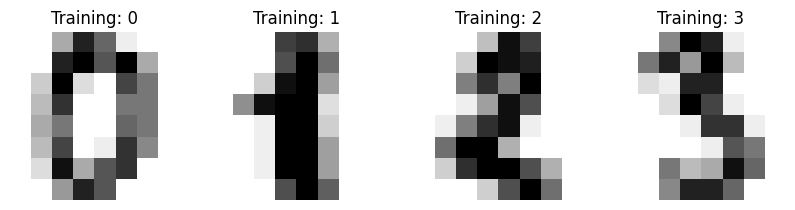

In [2]:
from sklearn.datasets import load_digits
df = load_digits()
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

In [3]:
df.images.shape


(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [6]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [7]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
data[0].shape

(64,)

In [9]:
data.shape

(1797, 64)

In [10]:
data.min()

0.0

In [11]:
data.max()

16.0

In [12]:
data = data/16

In [13]:
data.min()

0.0

In [14]:
data.max()

1.0

In [15]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, df.target, test_size = 0.3)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [18]:
y_pred = rf.predict(xtest)
y_pred

array([2, 2, 0, 9, 8, 0, 9, 9, 2, 0, 8, 3, 9, 0, 4, 3, 2, 9, 2, 2, 4, 7,
       6, 7, 8, 0, 6, 0, 0, 0, 2, 5, 2, 5, 1, 5, 3, 8, 5, 2, 8, 3, 5, 6,
       7, 5, 3, 4, 2, 3, 3, 0, 6, 9, 0, 3, 1, 4, 4, 6, 5, 1, 8, 3, 4, 3,
       4, 0, 5, 4, 4, 4, 1, 8, 5, 1, 3, 6, 5, 9, 7, 8, 9, 4, 2, 6, 5, 0,
       9, 6, 1, 7, 6, 2, 5, 2, 3, 5, 5, 6, 2, 3, 9, 2, 3, 0, 1, 9, 7, 1,
       5, 2, 7, 9, 3, 3, 7, 2, 1, 2, 4, 2, 6, 2, 7, 7, 2, 3, 4, 2, 1, 0,
       6, 8, 8, 9, 1, 7, 9, 3, 5, 1, 5, 7, 3, 2, 4, 7, 9, 1, 7, 5, 6, 2,
       0, 0, 0, 7, 1, 3, 6, 8, 7, 1, 0, 3, 1, 7, 7, 0, 3, 2, 6, 8, 3, 5,
       8, 3, 7, 5, 4, 4, 6, 8, 9, 8, 4, 1, 9, 9, 5, 3, 4, 6, 4, 2, 6, 4,
       0, 8, 5, 5, 5, 0, 8, 6, 8, 9, 7, 9, 9, 5, 3, 5, 9, 1, 9, 2, 0, 9,
       8, 6, 4, 5, 9, 3, 0, 7, 0, 5, 4, 6, 9, 4, 3, 0, 0, 7, 1, 8, 1, 5,
       7, 2, 5, 2, 0, 0, 4, 1, 3, 1, 0, 5, 4, 1, 6, 6, 2, 0, 2, 9, 9, 6,
       3, 1, 4, 9, 2, 2, 1, 2, 6, 5, 1, 1, 1, 9, 3, 7, 6, 7, 0, 8, 6, 3,
       5, 5, 8, 1, 6, 9, 8, 0, 3, 3, 1, 4, 6, 5, 1,

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, y_pred)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 48]])

In [20]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      1.00      0.96        51
           2       0.98      1.00      0.99        63
           3       1.00      0.98      0.99        57
           4       0.98      1.00      0.99        49
           5       0.98      0.98      0.98        57
           6       1.00      1.00      1.00        56
           7       0.98      1.00      0.99        51
           8       0.96      0.88      0.92        52
           9       1.00      0.96      0.98        50

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

